# [Lab 2] Gradient Descent Algorithm

## 1. Introduction

> **Gradient Descent** is an optimization algorithm which is commonly-used to train machine learning models and neural networks. It trains machine learning models by minimizing errors between predicted and actual results.

> `Gradient Descent Algorithm iteratively calculates the next point using gradient at the current position, scales it (by a learning rate) and subtracts obtained value from the current position (makes a step).`


## 2. Gradient Descent Algorithm

### 1.1. Cost function
> First of all, we will define our cost function to be $ x^2 + 4x + 2 $.  Not every function is suitable to be used for the gradient descent. There are two specific requirements. A function has to be:

- differentiable (if it has a derivative for each point in its domain),
- convex (if the second derivative $ f(x) \geq 0 $, for all x in an interval I).


In [51]:
def cost_function(x):
  return x**2+4*x+2

def cost_function2(x,y):
  return x**3*y**5




### 1.2. Deriving the optimization function
After we have defined the optimization function, we will take the first derivative of it and define our gradient function.

In [46]:
def gradient_function(x):
  return 2*x+1

def gradient_function2(x,y):

  return (3*x**2*y**5,5*x**3*y**4)

### 1.3. Gradient Descent function
> In order for us to implement the gradient descent algorithm, firstly, we need to define our parameters.
- The starting value of x can be any random number, but we will set its value to be 3. This value also affects the number of iterations that we will have.
- The learning rate, denoted by $ \alpha $, tells us how fast the algorithm will grow. We don't want to have the overshooting problem of putting the learning rate to be too large.
- Number of iterations define the maximum number of iterations that will need, to optimize our algorithm.
- Logging  is used to control whether or not the intermediate results are printed during the optimization process. If logging is set to True, the function will print the iteration number, the current value of x, and the corresponding cost at each iteration.



> ```
The gradient descent function returns the value of optimized x and the final cost for it. For each iteration we want to calculate
the result of our optimization function and store it in a y variable.
```



> You can check the pseudocode for the Gradient Descent Algorithm:
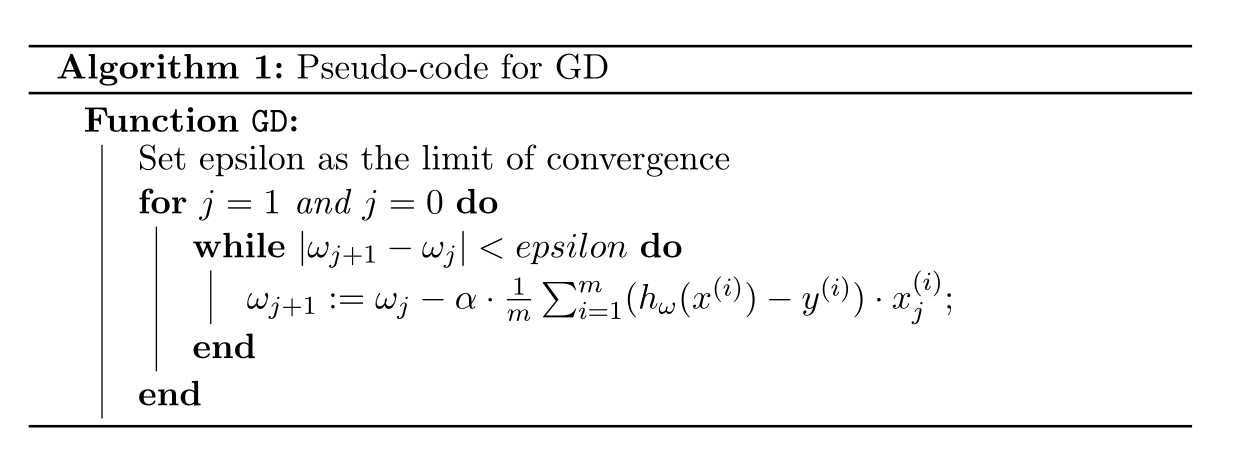

In [29]:
def gradient_descent(cost_function, gradient_function, initial_x, learning_rate, num_iterations, logging=False):
    x = initial_x
    epsilon = 1e-6
    xs = [x]
    costs = [cost_function(x)]

    for i in range(num_iterations):
        cost = cost_function(x)
        gradient = gradient_function(x)
        new_x = x - learning_rate * gradient
        xs.append(new_x)
        costs.append(cost_function(new_x))
        if logging:
            print(f"Iteration {i+1}: x = {x}, cost = {cost}")
        if abs(new_x - x) < epsilon:
            break
        x = new_x

    return x, cost_function(x), xs, costs

In [54]:
def gradient_descent_2(cost_function, gradient_function, initial_values, learning_rate, num_iterations, logging=False):
    x, y = initial_values
    epsilon = 1e-6
    xs, ys, costs = [x], [y], [cost_function(x, y)]  # Adjusted to pass x and y separately

    for i in range(num_iterations):
        cost = cost_function(x, y)  # Adjusted to pass x and y separately
        gradient_x, gradient_y = gradient_function(x, y)  # Adjusted to pass x and y separately
        new_x = x - learning_rate * gradient_x
        new_y = y - learning_rate * gradient_y
        if logging:
            print(f"Iteration {i+1}: x = {x}, y = {y}, cost = {cost}")
        if abs(new_x - x) < epsilon and abs(new_y - y) < epsilon:
            break
        x, y = new_x, new_y
        xs.append(x)
        ys.append(y)
        costs.append(cost_function(x, y))  # Adjusted to pass x and y separately

    return (x, y), cost_function(x, y), xs, ys, costs

### 1.4. Perform the algorithm

Call the gradient descent function with the appropriate parameter values. Print the values of optimized value X and its final cost for each iteration.

In [44]:
import numpy as np
import matplotlib.pyplot as plt


initial_x = 3
learning_rate = 0.2
num_iterations = 100
final_x, final_cost, xs, costs = gradient_descent(cost_function, gradient_function, initial_x, learning_rate, num_iterations, logging=True)



Iteration 1: x = 3, cost = 23
Iteration 2: x = 1.5999999999999999, cost = 10.959999999999999
Iteration 3: x = 0.76, cost = 5.6175999999999995
Iteration 4: x = 0.256, cost = 3.089536
Iteration 5: x = -0.0464, cost = 1.81655296
Iteration 6: x = -0.22784000000000001, cost = 1.1405510656
Iteration 7: x = -0.336704, cost = 0.766553583616
Iteration 8: x = -0.4020224, cost = 0.55353241010176
Iteration 9: x = -0.44121344, cost = 0.42981553963663366
Iteration 10: x = -0.464728064, cost = 0.3570599174691882
Iteration 11: x = -0.4788368384, cost = 0.3139373642089076
Iteration 12: x = -0.48730210304, cost = 0.2882549274672068
Iteration 13: x = -0.492381261824, cost = 0.27291425969939453
Iteration 14: x = -0.4954287570944, cost = 0.263734624978502
Iteration 15: x = -0.49725725425663997, cost = 0.2582357598842928
Iteration 16: x = -0.49835435255398397, cost = 0.2549396504935646
Iteration 17: x = -0.4990126115323904, cost = 0.25296314033881484
Iteration 18: x = -0.4994075669194342, cost = 0.251777650

In [57]:
initial_values = (0.1, 0.1)
learning_rate = 0.01
num_iterations = 100
final_position, final_cost, xs, ys, costs = gradient_descent_2(cost_function2, gradient_function2, initial_values, learning_rate, num_iterations, logging=True)

Iteration 1: x = 0.1, y = 0.1, cost = 1.0000000000000005e-08


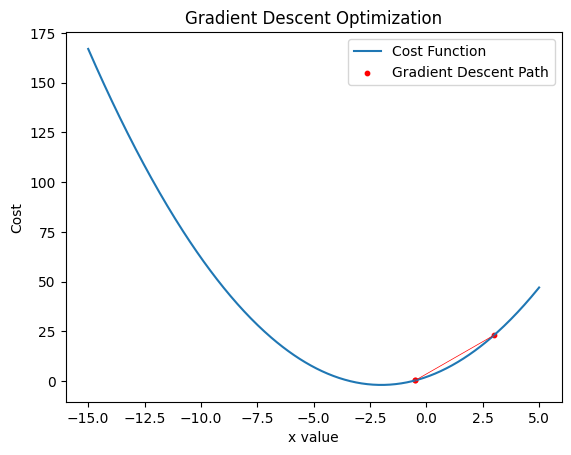

In [42]:

x_range = np.linspace(-15, 5, 400)
y_range = cost_function(x_range)
plt.plot(x_range, y_range, label="Cost Function")

plt.scatter(xs, costs, color="red", s=10, label="Gradient Descent Path")
plt.plot(xs, costs, color="red", linewidth=0.5)

plt.title("Gradient Descent Optimization")
plt.xlabel("x value")
plt.ylabel("Cost")
plt.legend()
plt.show()